In [1]:
%matplotlib inline
import pandas as ps
import numpy as np
from matplotlib import pyplot as plt
train = ps.read_csv('/home/sergio/Data/titanic/train.csv')
train[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [2]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Гистограммы значений

In [3]:
from math import log
def print_and_plot(data, column, step=None, base=None, ax=None):
    data = data[[column,"Survived"]].dropna()
    if step is not None:
        data[column] = [(int(row[column]//step * step),int(row[column]//step * step)+step)
                        for ind, row in data.iterrows()]
    elif base is not None:
        data[column] = [(base**int(log(row[column],base)), base**int(log(row[column],base)+1))
                        if row[column] != 0 else (0,0)
                        for ind, row in data.iterrows()]
    data = data.groupby([column, 'Survived'])[column].count().unstack('Survived').fillna(0, axis="columns")
    plot = data.plot(kind='bar', stacked=True, rot=(90 if any([step,base]) else 0), ax=ax)
    cols = data.columns
    data.insert(len(cols), "Count", [sum(x for x in row) for ind, row in data.iterrows()])
    for col in cols:
        data[col] = data[col].astype(np.float64) / data["Count"]
    return data

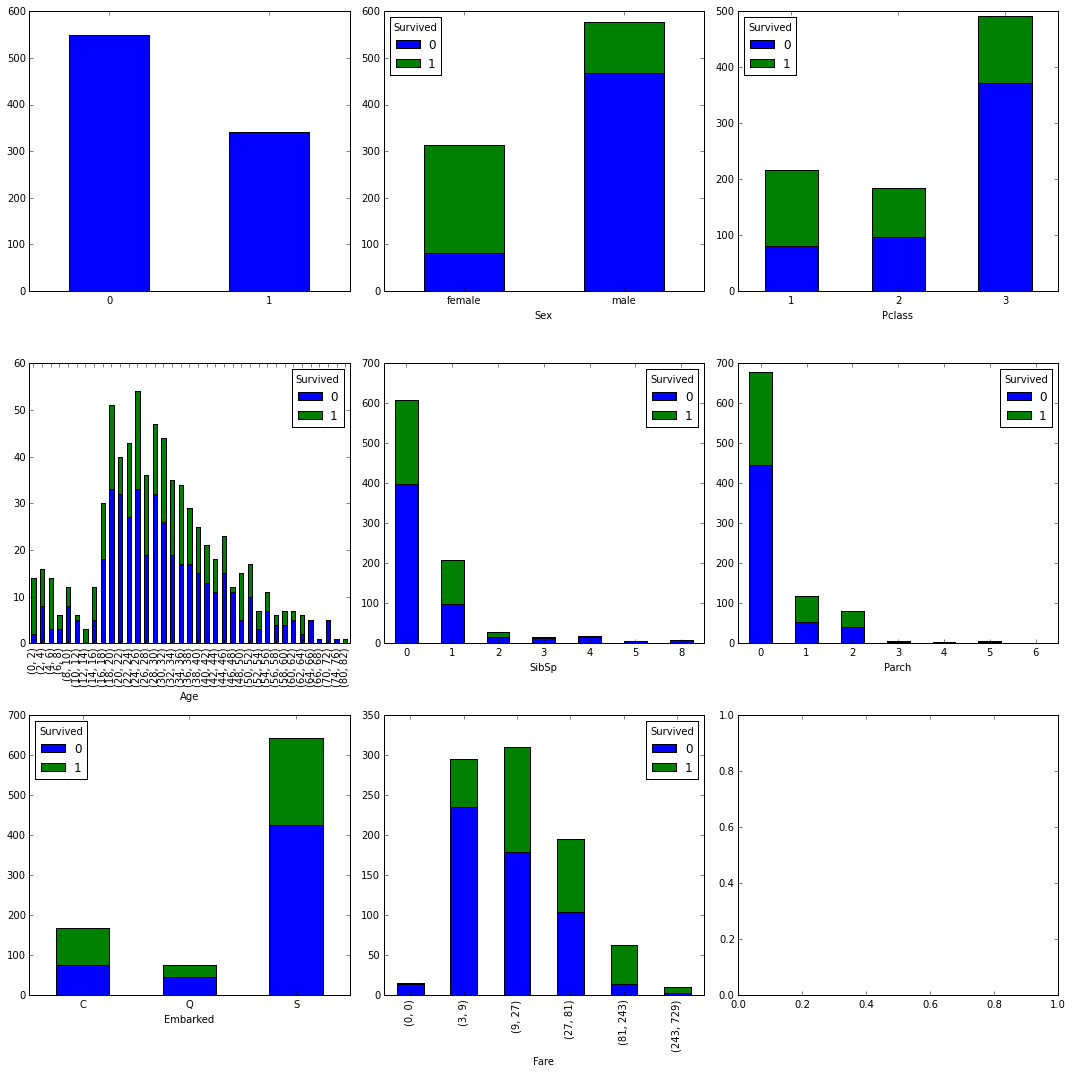

In [41]:
fig, axes = plt.subplots(nrows=3, ncols=3)
fig.set_size_inches(15,15)
train.Survived.value_counts().sort_index().plot(kind='bar', rot=0, ax=axes[0,0])
tables = [
    print_and_plot(train, "Sex", ax=axes[0,1]),
    print_and_plot(train, "Pclass", ax=axes[0,2]),
    print_and_plot(train, "Age", step=2, ax=axes[1,0]),
    print_and_plot(train, "SibSp", ax=axes[1,1]),
    print_and_plot(train, "Parch", ax=axes[1,2]),
    print_and_plot(train, "Embarked", ax=axes[2,0]),
    print_and_plot(train, "Fare", base=3, ax=axes[2,1])
]
fig.tight_layout()

In [42]:
for table in tables:
    print(table, "\n")

Survived         0         1  Count
Sex                                
female    0.257962  0.742038    314
male      0.811092  0.188908    577 

Survived         0         1  Count
Pclass                             
1         0.370370  0.629630    216
2         0.527174  0.472826    184
3         0.757637  0.242363    491 

Survived         0         1  Count
Age                                
(0, 2)    0.142857  0.857143     14
(2, 4)    0.500000  0.500000     16
(4, 6)    0.214286  0.785714     14
(6, 8)    0.500000  0.500000      6
(8, 10)   0.666667  0.333333     12
(10, 12)  0.833333  0.166667      6
(12, 14)  0.000000  1.000000      3
(14, 16)  0.416667  0.583333     12
(16, 18)  0.600000  0.400000     30
(18, 20)  0.647059  0.352941     51
(20, 22)  0.800000  0.200000     40
(22, 24)  0.627907  0.372093     43
(24, 26)  0.611111  0.388889     54
(26, 28)  0.527778  0.472222     36
(28, 30)  0.680851  0.319149     47
(30, 32)  0.590909  0.409091     44
(32, 34)  0.542857  0.45

## Количество людей по SibSp + Parch

Survived,0,1,Count
SibPar,,,
0,0.696462,0.303538,537
1,0.447205,0.552795,161
2,0.421569,0.578431,102
3,0.275862,0.724138,29
4,0.800000,0.200000,15
5,0.863636,0.136364,22
6,0.666667,0.333333,12
7,1.000000,0.000000,6
10,1.000000,0.000000,7


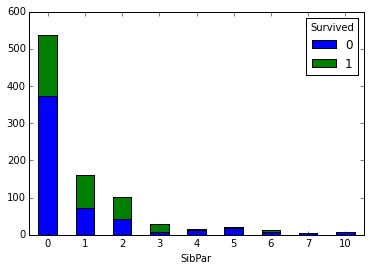

In [10]:
sp = train.copy()
sp.insert(len(sp.columns), "SibPar", [row.SibSp + row.Parch for ind, row in sp.iterrows()])
print_and_plot(sp, "SibPar")

## Количество людей по префиксу номера билета

Survived,0,1,Count
TicketPrefix,,,
A,0.928571,0.071429,28
A4,1.000000,0.000000,1
C,0.545455,0.454545,33
CA,0.928571,0.071429,14
F,0.333333,0.666667,6
Fa,1.000000,0.000000,1
LINE,0.750000,0.250000,4
None,0.615734,0.384266,661
P,0.500000,0.500000,2


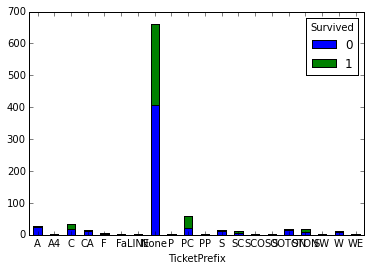

In [11]:
def is_num(x):
    try:
        int(x)
    except ValueError:
        return False
    else:
        return True
prefix = lambda ticket: ticket.split()[0].split(".")[0].split("/")[0] if not is_num(ticket) else "None"
tmp = train.copy()
tmp.insert(len(tmp.columns), "TicketPrefix", [prefix(ticket) for ticket in tmp.Ticket])
print_and_plot(tmp, "TicketPrefix")

## Количество людей по палубе

Survived,0,1,Count
Deck,,,
-,0.700146,0.299854,687
A,0.533333,0.466667,15
B,0.255319,0.744681,47
C,0.406780,0.593220,59
D,0.242424,0.757576,33
E,0.250000,0.750000,32
F,0.384615,0.615385,13
G,0.500000,0.500000,4
T,1.000000,0.000000,1


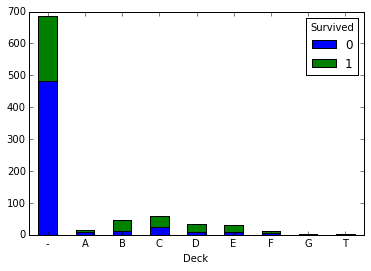

In [12]:
deck = lambda cabin: cabin[0].upper() if type(cabin) == str else "-"
tmp = train.copy()
tmp.insert(len(tmp.columns), "Deck", [deck(cabin) for cabin in tmp.Cabin])
print_and_plot(tmp, "Deck")

## Количество людей по титулу

Survived,0,1,Count
Title,,,
Capt,1.000000,0.000000,1
Col,0.500000,0.500000,2
Don,1.000000,0.000000,1
Dr,0.571429,0.428571,7
Jonkheer,1.000000,0.000000,1
Lady,0.000000,1.000000,1
Major,0.500000,0.500000,2
Master,0.425000,0.575000,40
Miss,0.302198,0.697802,182


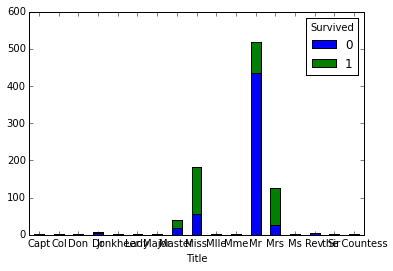

In [44]:
title = lambda name: name.split(",")[1].split(".")[0].strip()
tmp = train.copy()
tmp.insert(len(tmp.columns), "Title", [title(name) for name in tmp.Name])
print_and_plot(tmp, "Title")